In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import cvxpy as cp
import matplotlib.pyplot as plt
import math

In [2]:
train_cat=np.matrix(np.loadtxt('train_cat.txt',delimiter=','))
train_grass=np.matrix(np.loadtxt('train_grass.txt',delimiter=','))

In [3]:
mean_cat=np.mean(train_cat)
mean_grass=np.mean(train_grass)
cov_cat=np.cov(train_cat)
cov_grass=np.cov(train_grass)
prior_grass=9556/(9556+1976)
prior_cat=1976/(9556+1976)
det_cat=np.linalg.det(cov_cat)
det_grass=np.linalg.det(cov_grass)
cov_inv_cat=np.linalg.pinv(cov_cat)
cov_inv_grass=np.linalg.pinv(cov_grass)

In [4]:
Y=plt.imread('cat_grass.jpg')/255
M,N=np.shape(Y)

In [5]:
def classification(x,a,b):
    out=np.zeros((a,b))
    for i in range(a-8):
        for j in range(b-8):
            z=x[i:i+8,j:j+8]
            za=z.flatten('F')
            zb=np.asmatrix(za)
            a_test1=zb-mean_cat
            a_test2=zb-mean_grass
            g_cat=(-0.5*a_test1*cov_inv_cat*np.transpose(a_test1))-(0.5*np.log(det_cat))+np.log(prior_cat)
            g_grass=(-0.5*a_test1*cov_inv_grass*np.transpose(a_test1))-(0.5*np.log(det_grass))+np.log(prior_grass)
            if (g_cat>g_grass):
                out[i,j]=1
    return out
output1=classification(Y,M,N)

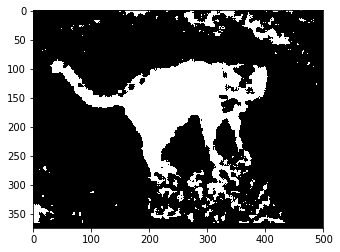

In [6]:
plt.imshow(output1*255,cmap='gray')

In [7]:
def oclassification(x,a,b):
    out=np.zeros((a,b))
    for i in range(0,a-8,8):
        for j in range(0,b-8,8):
            z=x[i:i+8,j:j+8]
            za=z.flatten('F')
            zb=np.asmatrix(za)
            a_test1=zb-mean_cat
            a_test2=zb-mean_grass
            g_cat=(-0.5*a_test1*cov_inv_cat*np.transpose(a_test1))-(0.5*np.log(det_cat))+np.log(prior_cat)
            g_grass=(-0.5*a_test1*cov_inv_grass*np.transpose(a_test1))-(0.5*np.log(det_grass))+np.log(prior_grass)
            if (g_cat>g_grass):
                out[i:i+8,j:j+8]=1
    return out
output2=oclassification(Y,M,N)

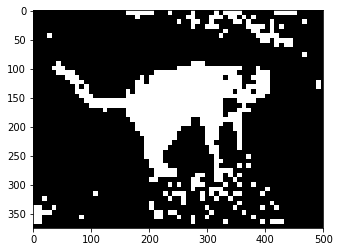

In [8]:
plt.imshow(output2*255,cmap='gray')

In [9]:
Ya=plt.imread('truth.png')/255
accuracy1=abs(Ya-output1).mean()
print('the performance of the classifier constructed in ii) and iii) using absolute error are:')
print(accuracy1)
accuracy2=abs(Ya-output2).mean()
print (accuracy2)

the performance of the classifier constructed in ii) and iii) using absolute error are:
0.19750509411780998
0.202992464451117


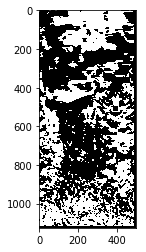

In [10]:
cheetah=plt.imread('cheetah-0031.jpg')/255
cheet=cheetah.reshape((cheetah.shape[0]*cheetah.shape[2]),cheetah.shape[1])
A,B=np.shape(cheet)
output3=classification(cheet,A,B)
plt.imshow(output3*255,cmap='gray')

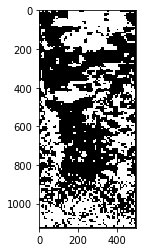

In [11]:
output4=oclassification(cheet,A,B)
plt.imshow(output4*255,cmap='gray')

In [12]:
mean1=np.array([4,12])
mean2=np.array([1,3])
cov=np.array([[2,1],[1,2]])
data1=np.random.multivariate_normal(mean1,cov,1000)
data2=np.random.multivariate_normal(mean2,cov,1000)
data11=pd.DataFrame(data1,columns=['x1','x2'])
data21=pd.DataFrame(data2,columns=['x1','x2'])

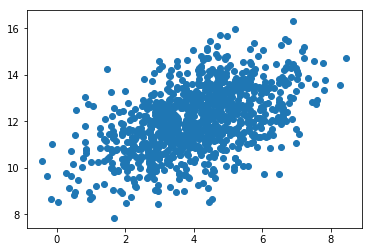

In [13]:
plt.scatter(data11.x1,data11.x2)

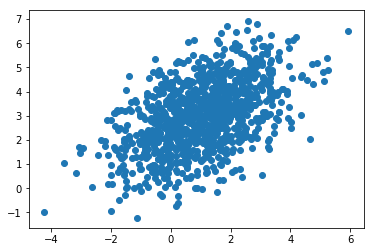

In [14]:
plt.scatter(data21.x1,data21.x2)

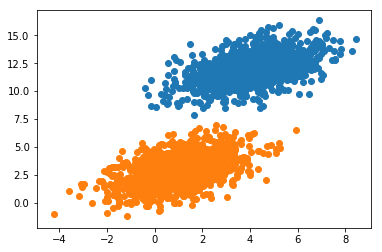

In [15]:
plt.scatter(data11.x1,data11.x2)
plt.scatter(data21.x1,data21.x2)

In [16]:
bdata1=np.ones(1000)
bdata2=-1*np.ones(1000)
diff=np.ones(2000)
ad=data11
ad=ad.append(data21)
ad=ad.assign(col=diff)
bd=pd.DataFrame(bdata1,columns=['label'])
bfd=pd.DataFrame(bdata2,columns=['label'])
bd=bd.append(bfd)
a=np.array(ad)
b=np.array(bd)
tetaopt3c=cp.Variable(3)
objective=cp.Minimize(cp.sum_squares(a*tetaopt3c-b))
constraints=[]
prob=cp.Problem(objective,constraints)
optimal_obj_value=prob.solve(solver="SCS")
w1,w2,w0=tetaopt3c.value
print(tetaopt3c.value)

[[-0.04456945]
 [ 0.21734484]
 [-1.52052887]]


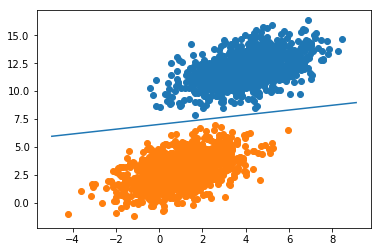

In [17]:
plt.scatter(data11.x1,data11.x2)
plt.scatter(data21.x1,data21.x2)
xmin,xmax=plt.xlim()
y3a=[]
x3a=np.linspace(xmin, xmax, 200)
y3a=(-(-0.04650748/0.21698269)*x3a)-(-1.52371347/0.21698269)
plt.plot(x3a, y3a.T)

In [18]:
n=9556+1976
mean21=mean2-mean1
mean212=np.asmatrix(mean21)
covariance1=np.linalg.pinv(cov)
mean12=np.transpose(mean212)
alpha=(2*n)/(((4*n)-4)+(n*mean212*covariance1*mean12))

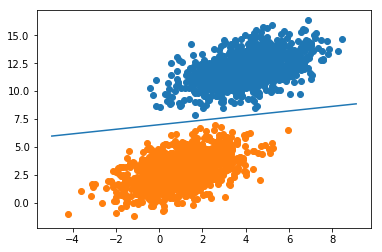

In [19]:
beta0=w0/alpha
beta1=w1/alpha
beta2=w2/alpha
plt.scatter(data11.x1,data11.x2)
plt.scatter(data21.x1,data21.x2)
xmin,xmax=plt.xlim()
y3a1=[]
x3a1=np.linspace(xmin, xmax, 200)
y3a1=(-(beta1/beta2)*x3a)-(beta0/beta2)
plt.plot(x3a1, y3a1.T)